In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Prep. DATA

#### 1. Load Data and Observe

In [2]:
# load data
df = pd.read_csv('../../data/H2.csv')

In [3]:
df.shape

(79330, 31)

In [ ]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [5]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [6]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

#### 2. Clean Null Values

In [7]:
# Missing Value Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Missing Value Report
missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

missing_report[missing_report["Missing Values"] > 0]


,Missing Values,Percentage (%)
Country,24,0.030253
Children,4,0.005042


In [8]:
# Fill missing values in 'Children' column with 0
df['Children'].fillna(0, inplace=True)

# Fill missing values in 'Country' column with the most frequent value
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
df.isnull().sum().any()

np.False_

#### 3. Remove Duplicates

In [9]:
print(f"Total Number of Duplicate Rows: {len(df) - len(df.drop_duplicates())}")

Total Number of Duplicate Rows: 25902


In [10]:
# Remove Duplicate Rows
df = df.drop_duplicates()

In [11]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [12]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [13]:
# Remove leading and trailing spaces from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
# Replace "NULL" values with 0 in 'Agent' column and convert the column type to int
df['Agent'].replace('NULL', 0, inplace=True)
df['Agent'] = df['Agent'].astype(int)

# Replace "NULL" values with 0 in 'Company' column and convert the column type to int
df['Company'].replace('NULL', 0, inplace=True)
df['Company'] = df['Company'].astype(int)

#### 4. Selected Columns for Customer Segmentation

In [15]:
df_segment = df[['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 
                 'ADR', 'TotalOfSpecialRequests', 'CustomerType', 
                 'MarketSegment', 'IsRepeatedGuest', 'DepositType', 'ReservationStatus']]

In [16]:
df_segment.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,ADR,TotalOfSpecialRequests,CustomerType,MarketSegment,IsRepeatedGuest,DepositType,ReservationStatus
0,6,0,2,0.0,0,Transient,Offline TA/TO,0,No Deposit,Check-Out
1,88,0,4,76.5,1,Transient,Online TA,0,No Deposit,Canceled
2,65,0,4,68.0,1,Transient,Online TA,0,No Deposit,Canceled
3,92,2,4,76.5,2,Transient,Online TA,0,No Deposit,Canceled
4,100,0,2,76.5,1,Transient,Online TA,0,No Deposit,Canceled


In [17]:
df_segment.shape

(53428, 10)

#### 5. Outlier Detection and Elimination

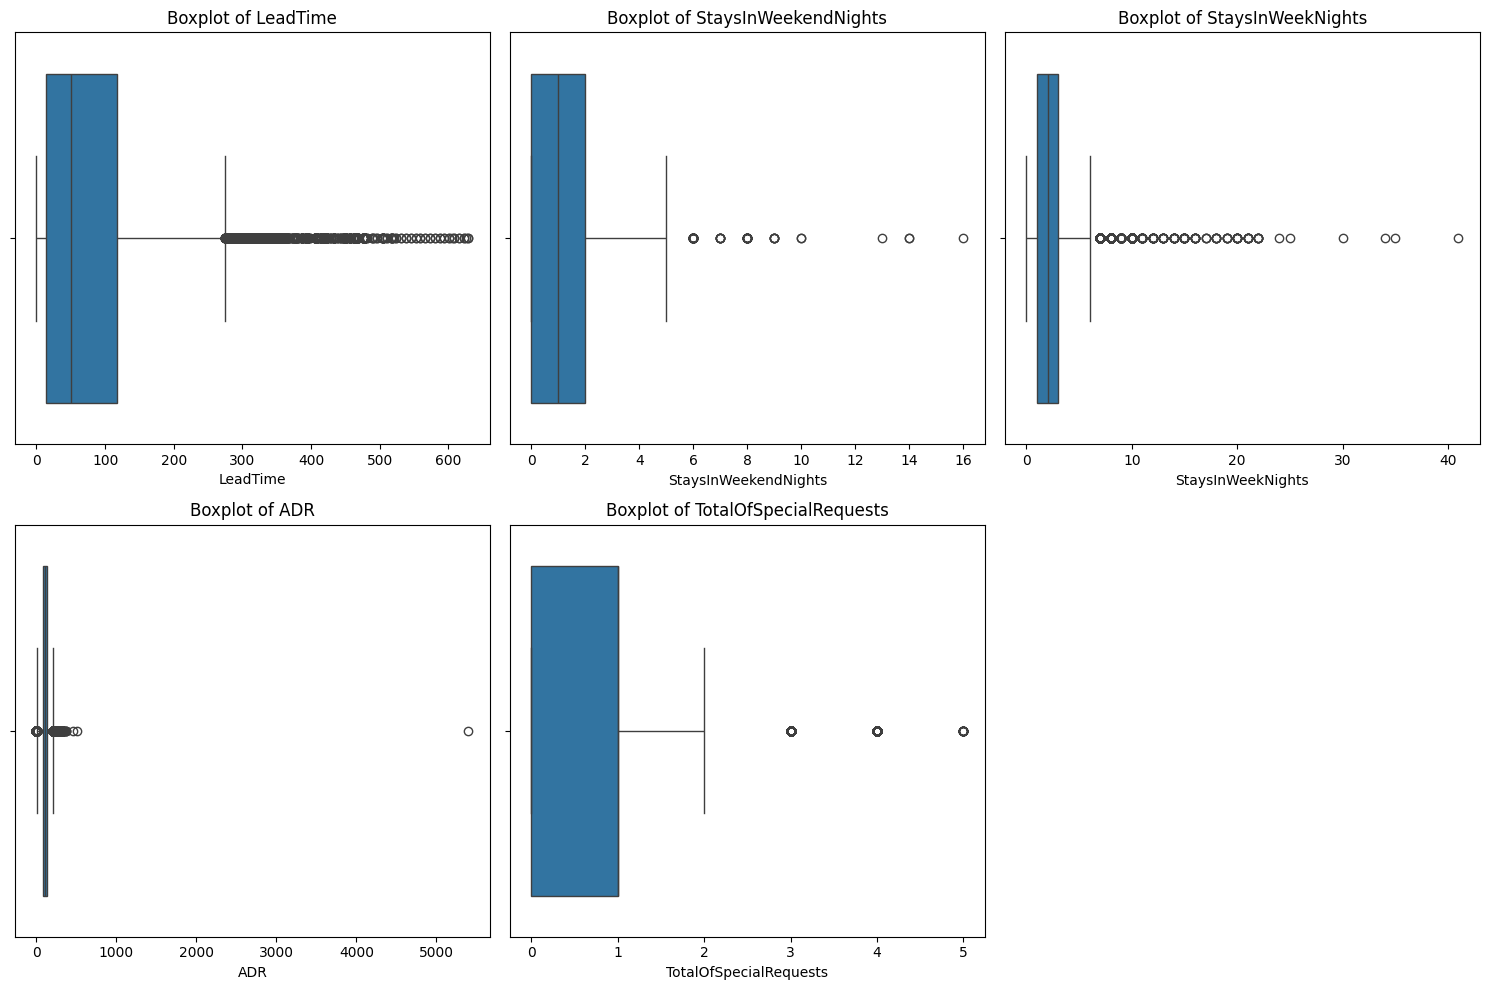

In [18]:
#### Outlier Analysis on `df_segment` Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting boxplots for numerical columns to identify outliers
numerical_columns = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'ADR', 'TotalOfSpecialRequests']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_segment[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [19]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from numerical columns in df_segment
df_segment = remove_outliers(df_segment, numerical_columns)

# Display the shape of the cleaned dataframe
df_segment.shape

(47286, 10)

#### 6. Remove Rare Categories

In [20]:
# Define a threshold for rare categories (e.g., categories that appear in less than 1% of the data)
threshold = 0.01

# Function to remove rare categories
def remove_rare_categories(df, column, threshold):
    value_counts = df[column].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    df = df[~df[column].isin(rare_categories)]
    return df

# Apply the function to categorical columns in df_segment
categorical_columns = ['CustomerType', 'MarketSegment', 'DepositType', 'ReservationStatus']
for column in categorical_columns:
    df_segment = remove_rare_categories(df_segment, column, threshold)

# Display the shape of the cleaned dataframe
df_segment.shape

(46812, 10)

#### 7. Analyze Columns

##### Numeric Colums

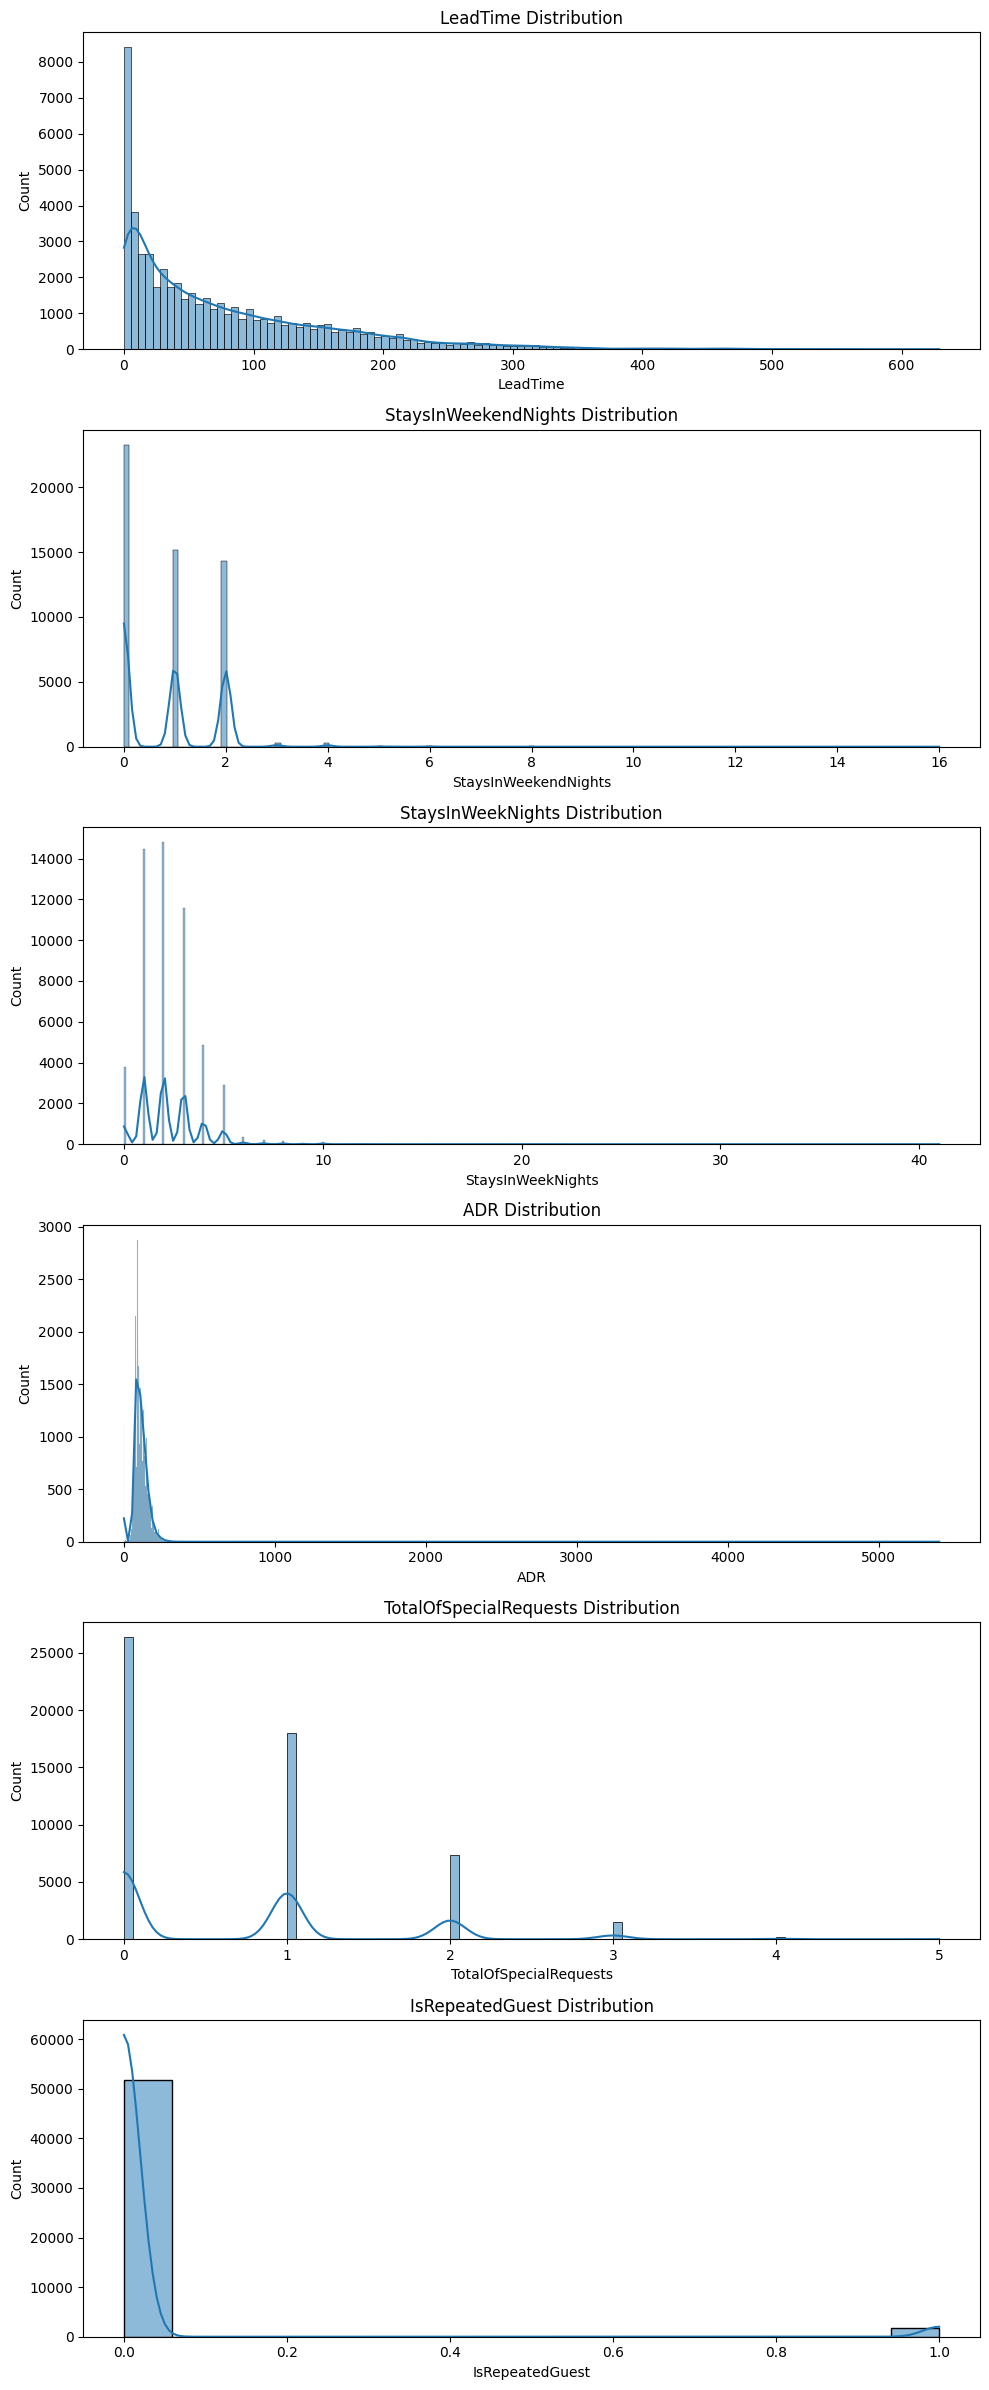

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's examine the distributions in the numerical columns
numeric_columns = df_segment.select_dtypes(include=['int64', 'float64']).columns

# Let's draw the histogram of all numerical columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, len(numeric_columns) * 4))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

There are currently significant outliers in the `ADR` (Average Daily Rate) and `LeadTime` columns. In particular, outliers can negatively impact the performance of clustering algorithms.

In [22]:
df_segment.shape

(46812, 10)

###### Handle Outliers

In [23]:
from scipy.stats import zscore

# LeadTime ve ADR sütunlarındaki uç değerleri temizlemek için z-score yöntemi uygulayalım
z_scores = df_segment[['LeadTime', 'ADR']].apply(zscore)

# Let's remove values ​​outside 3 standard deviations
df_segment = df_segment[(z_scores.abs() < 3).all(axis=1)]

df_segment.shape

(46751, 10)

###### Handle Skewness

In [24]:
# Skewness Check
df_segment[['LeadTime', 'ADR']].skew()

LeadTime    0.972102
ADR         0.561951
dtype: float64

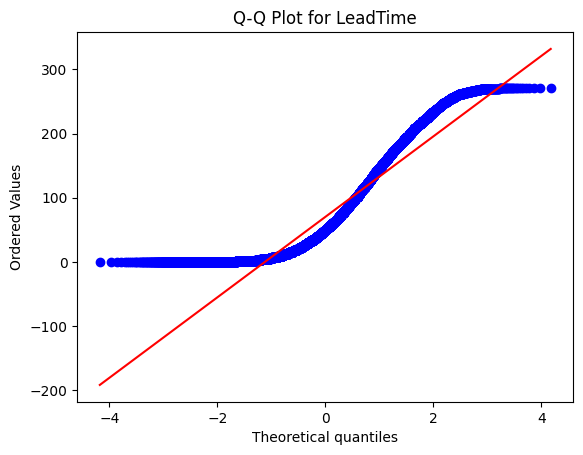

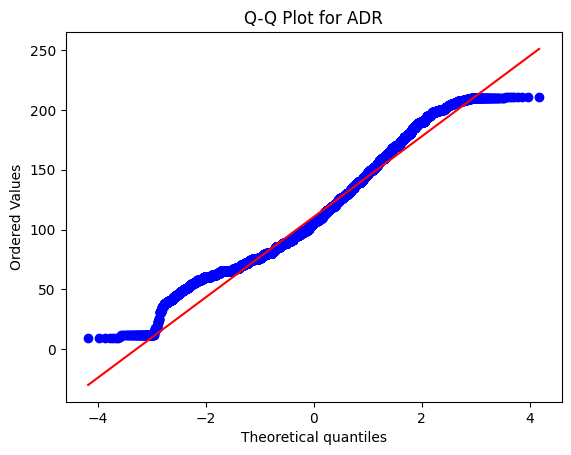

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot for LeadTime
stats.probplot(df_segment['LeadTime'], dist="norm", plot=plt)
plt.title("Q-Q Plot for LeadTime")
plt.show()

# Q-Q Plot for ADR
stats.probplot(df_segment['ADR'], dist="norm", plot=plt)
plt.title("Q-Q Plot for ADR")
plt.show()

In [26]:
# Log Transformation for LeadTime
df_segment['LeadTime'] = np.log1p(df_segment['LeadTime'])

##### Categorical Columns

In [27]:
# Let's look at the class distribution of categorical columns
categorical_columns = df_segment.select_dtypes(include=['object']).columns
class_distributions = {col: df[col].value_counts() for col in categorical_columns}
class_distributions 

{'CustomerType': CustomerType
 Transient          44641
 Transient-Party     7045
 Contract            1471
 Group                271
 Name: count, dtype: int64,
 'MarketSegment': MarketSegment
 Online TA        34994
 Offline TA/TO     7271
 Direct            5559
 Groups            2635
 Corporate         2227
 Complementary      513
 Aviation           227
 Undefined            2
 Name: count, dtype: int64,
 'DepositType': DepositType
 No Deposit    52568
 Non Refund      845
 Refundable       15
 Name: count, dtype: int64,
 'ReservationStatus': ReservationStatus
 Check-Out    37379
 Canceled     15301
 No-Show        748
 Name: count, dtype: int64}

`CustomerType`: The "Transient" category is dominant at a high rate of 84%. This imbalance may cause certain categories to dominate.

`MarketSegment`: "Online TA" and "Offline TA/TO" appear dominant. However, the data imbalance is not very severe.

`DepositType`: The "No Deposit" category is extremely dominant at a rate of 99%.

`ReservationStatus`: "Check-Out" appears dominant, but the other classes are still not so underrepresented that they should be ignored.

###### Handle Category imbalance

In [28]:
# Group "Online" and "Offline" categories in MarketSegment column
df_segment['MarketSegment'] = df_segment['MarketSegment'].replace({
    'Online TA': 'Online',
    'Offline TA/TO': 'Offline',
    'Direct': 'Offline',
    'Corporate': 'Offline',
    'Complementary': 'Offline',
    'Groups': 'Offline',
    'Undefined': 'Offline'
})

# Verify the changes
df_segment['MarketSegment'].value_counts()

MarketSegment
Online     31348
Offline    15403
Name: count, dtype: int64

In [29]:
# Remove DepositType column because it was unbalanced
df_segment.drop(columns=['DepositType'], inplace=True)

In [30]:
# Combine "Canceled" and "No-Show" categories into "Unsuccessful Reservations"
df_segment['ReservationStatus'] = df_segment['ReservationStatus'].replace({
    'Canceled': 'Unsuccessful Reservations',
    'No-Show': 'Unsuccessful Reservations'
})

# Verify the changes
df_segment['ReservationStatus'].value_counts()

ReservationStatus
Check-Out                    32920
Unsuccessful Reservations    13831
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in ['CustomerType', 'MarketSegment', 'ReservationStatus']:
    le = LabelEncoder()
    df_segment[column] = le.fit_transform(df_segment[column])
    label_encoders[column] = le

# Define target and features
X = df_segment.drop(columns=['CustomerType'])
y = df_segment['CustomerType']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Add the resampled target back to the dataframe
X_resampled['CustomerType'] = y_resampled

# Decode the categorical columns
for column, le in label_encoders.items():
    X_resampled[column] = le.inverse_transform(X_resampled[column])

# Assign the resampled dataframe back to df_segment
df_segment = X_resampled

df_segment.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,ADR,TotalOfSpecialRequests,MarketSegment,IsRepeatedGuest,ReservationStatus,CustomerType
0,4.488636,0,4,76.5,1,Online,0,Unsuccessful Reservations,Transient
1,4.189655,0,4,68.0,1,Online,0,Unsuccessful Reservations,Transient
2,4.532599,2,4,76.5,2,Online,0,Unsuccessful Reservations,Transient
3,4.615121,0,2,76.5,1,Online,0,Unsuccessful Reservations,Transient
4,4.382027,0,3,76.5,1,Online,0,Unsuccessful Reservations,Transient


In [32]:
df_segment['CustomerType'].value_counts()

CustomerType
Transient          39495
Transient-Party    39495
Contract           39495
Name: count, dtype: int64

# ML Prep.

#### 1. Encode Categorical Variables

In [33]:
# Encode categorical columns
df_encoded = pd.get_dummies(
    df_segment,
    columns=["CustomerType", "MarketSegment", "ReservationStatus"],
    drop_first=True,
)

df_encoded.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,ADR,TotalOfSpecialRequests,IsRepeatedGuest,CustomerType_Transient,CustomerType_Transient-Party,MarketSegment_Online,ReservationStatus_Unsuccessful Reservations
0,4.488636,0,4,76.5,1,0,True,False,True,True
1,4.189655,0,4,68.0,1,0,True,False,True,True
2,4.532599,2,4,76.5,2,0,True,False,True,True
3,4.615121,0,2,76.5,1,0,True,False,True,True
4,4.382027,0,3,76.5,1,0,True,False,True,True


#### 2. Scale the data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

##### 3. Dimensionality reduction with PCA

In [35]:
from sklearn.decomposition import PCA

# Let's find the number of components that explain 95% of the total variance with PCA
pca = PCA(0.95)
df_pca = pca.fit_transform(df_scaled)

# Number of selected components
optimal_components = pca.n_components_
optimal_components

np.int64(9)

# Train DBScan ML

##### Find Optimal eps

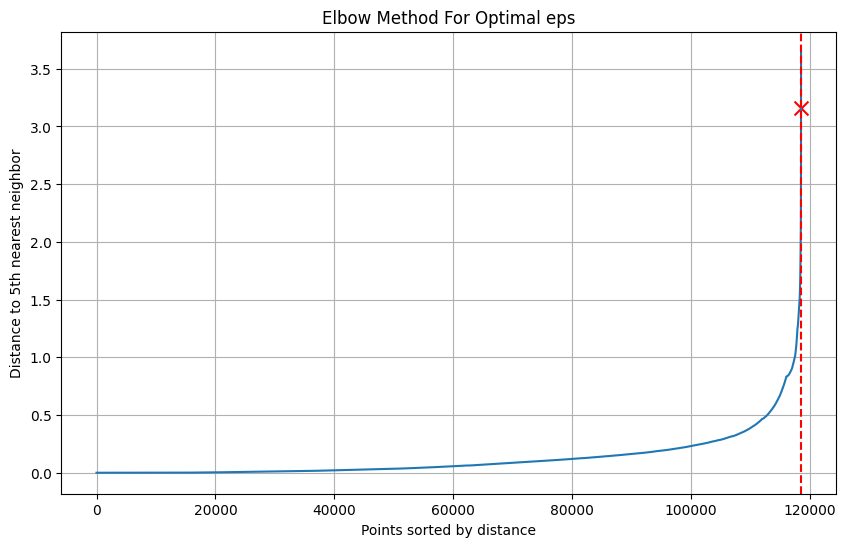

np.float64(3.1641245731007817)

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Fit the NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort the distances to the 5th nearest neighbor
distances = np.sort(distances[:, 4])

# Determine the optimal eps value
optimal_eps = distances[np.argmax(np.diff(distances, 2))]

# Plot the optimal eps value on the graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.axvline(x=np.argmax(np.diff(distances, 2)), color='r', linestyle='--')
plt.scatter(np.argmax(np.diff(distances, 2)), optimal_eps, color='red', marker='x', s=100)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('Elbow Method For Optimal eps')
plt.grid()
plt.show()

optimal_eps

##### Fin Optimal min_samples

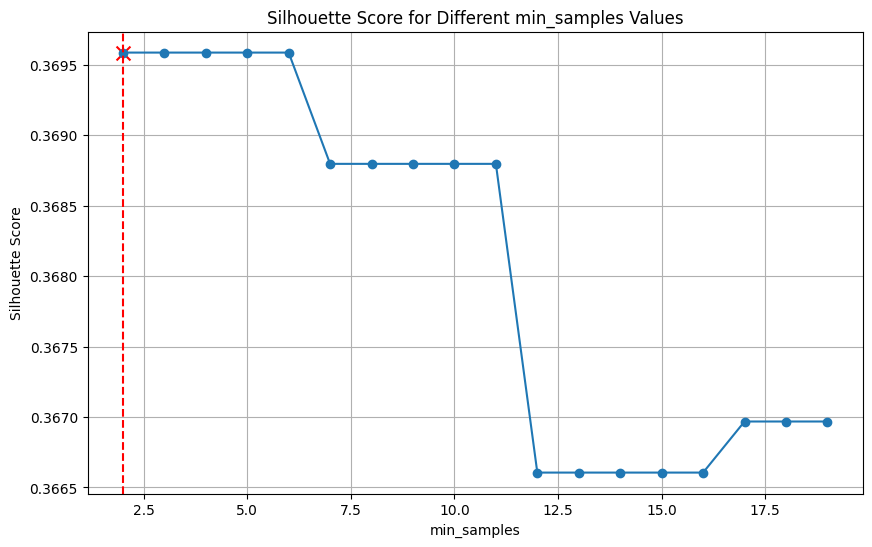

2

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of min_samples values to test
min_samples_range = range(2, 20)

# List to store silhouette scores for each min_samples value
silhouette_scores = []

# Process data in chunks to avoid memory errors
chunk_size = 10000
num_chunks = len(df_pca) // chunk_size + 1

# Loop over the range of min_samples values
for min_samples in min_samples_range:
    silhouette_scores_chunk = []
    for chunk in range(num_chunks):
        start = chunk * chunk_size
        end = (chunk + 1) * chunk_size
        df_chunk = df_pca[start:end]
        
        # Initialize and fit the DBSCAN model
        dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_chunk)
        
        # Calculate the silhouette score if there are more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(df_chunk, labels)
            silhouette_scores_chunk.append(score)
        else:
            silhouette_scores_chunk.append(-1)  # Invalid score for single cluster
    
    # Average the silhouette scores for the current min_samples value
    silhouette_scores.append(np.mean(silhouette_scores_chunk))

# Find the optimal min_samples value
optimal_min_samples = min_samples_range[np.argmax(silhouette_scores)]

# Plot the silhouette scores for each min_samples value
plt.figure(figsize=(10, 6))
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.axvline(x=optimal_min_samples, color='r', linestyle='--')
plt.scatter(optimal_min_samples, max(silhouette_scores), color='red', marker='x', s=100)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different min_samples Values')
plt.grid()
plt.show()

optimal_min_samples

I used this method with chunks, because I don't have enough ram for it. Code without using chunks:

```python 

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of min_samples values to test
min_samples_range = range(2, 20)

# List to store silhouette scores for each min_samples value
silhouette_scores = []

# Loop over the range of min_samples values
for min_samples in min_samples_range:
    # Initialize and fit the DBSCAN model
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)
    
    # Calculate the silhouette score if there are more than 1 cluster
    if len(set(labels)) > 1:
        score = silhouette_score(df_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid score for single cluster

# Find the optimal min_samples value
optimal_min_samples = min_samples_range[np.argmax(silhouette_scores)]

# Plot the silhouette scores for each min_samples value
plt.figure(figsize=(10, 6))
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different min_samples Values')
plt.grid()
plt.show()
```

##### Train and Evaluate DBScan Model

In [39]:
# Train DBScan model with optimal parameters in chunks
chunk_size = 10000
num_chunks = len(df_pca) // chunk_size + 1
labels = np.array([])

for chunk in range(num_chunks):
	start = chunk * chunk_size
	end = (chunk + 1) * chunk_size
	df_chunk = df_pca[start:end]
	
	dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
	chunk_labels = dbscan.fit_predict(df_chunk)
	labels = np.concatenate([labels, chunk_labels])

# Add cluster labels to the dataframe
df_segment['DBScan_Cluster'] = labels

Code without using chunks
```python
# Train DBScan model with optimal parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(df_pca)

# Add cluster labels to the dataframe
df_segment['DBScan_Cluster'] = dbscan.labels_
```

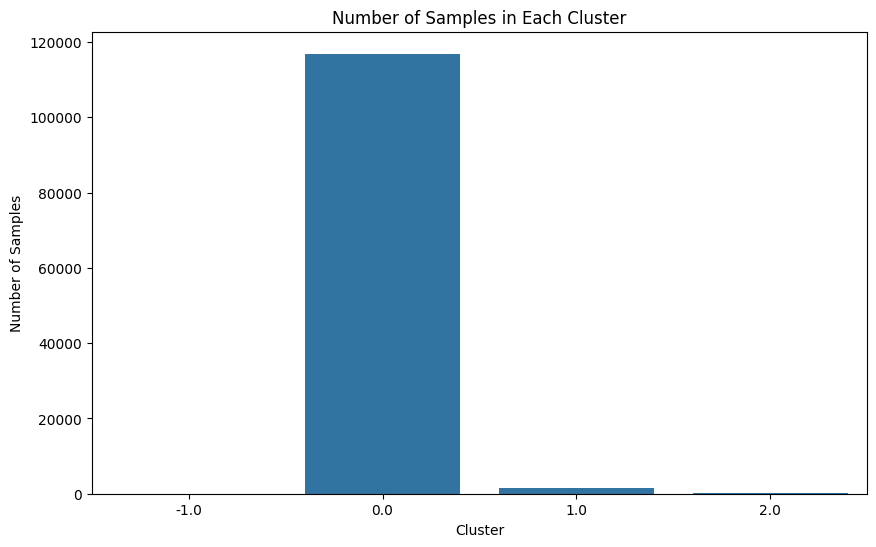

In [40]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a countplot for the number of samples in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='DBScan_Cluster', data=df_segment)
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

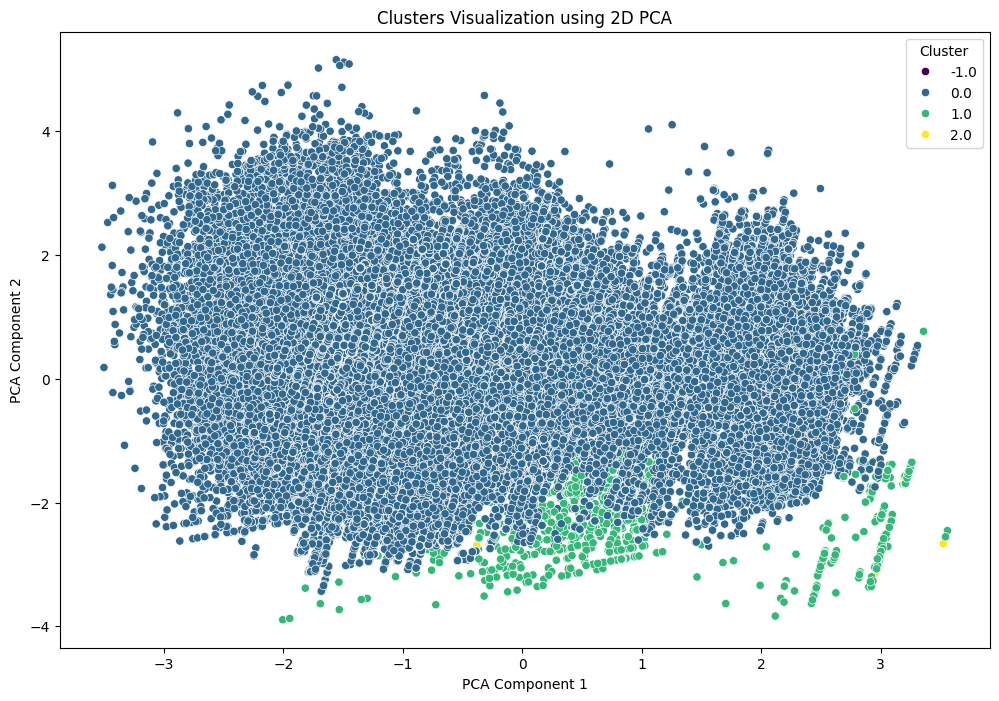

In [42]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reduce the data to 2D using PCA
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(df_scaled)

# Add the reduced data to the dataframe
df_segment['PCA1'] = reduced_data[:, 0]
df_segment['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBScan_Cluster', data=df_segment, palette='viridis', legend='full')
plt.title('Clusters Visualization using 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def calculate_clustering_scores(X, labels):
    scores = {}
    scores['Silhouette Score'] = silhouette_score(X, labels)
    scores['Davies-Bouldin Score'] = davies_bouldin_score(X, labels)
    scores['Calinski-Harabasz Score'] = calinski_harabasz_score(X, labels)
    
    # Calculate Noise Ratio (assuming -1 label indicates noise)
    noise_ratio = (labels == -1).sum() / len(labels)
    scores['Noise Ratio'] = noise_ratio
    
    return scores

In [45]:
clustering_scores = calculate_clustering_scores(df_pca, labels)
print(clustering_scores)

{'Silhouette Score': np.float64(0.5686531435915555), 'Davies-Bouldin Score': np.float64(1.2659780678001202), 'Calinski-Harabasz Score': np.float64(4837.644128768472), 'Noise Ratio': np.float64(8.439886905515467e-06)}


##### Understand Clusters

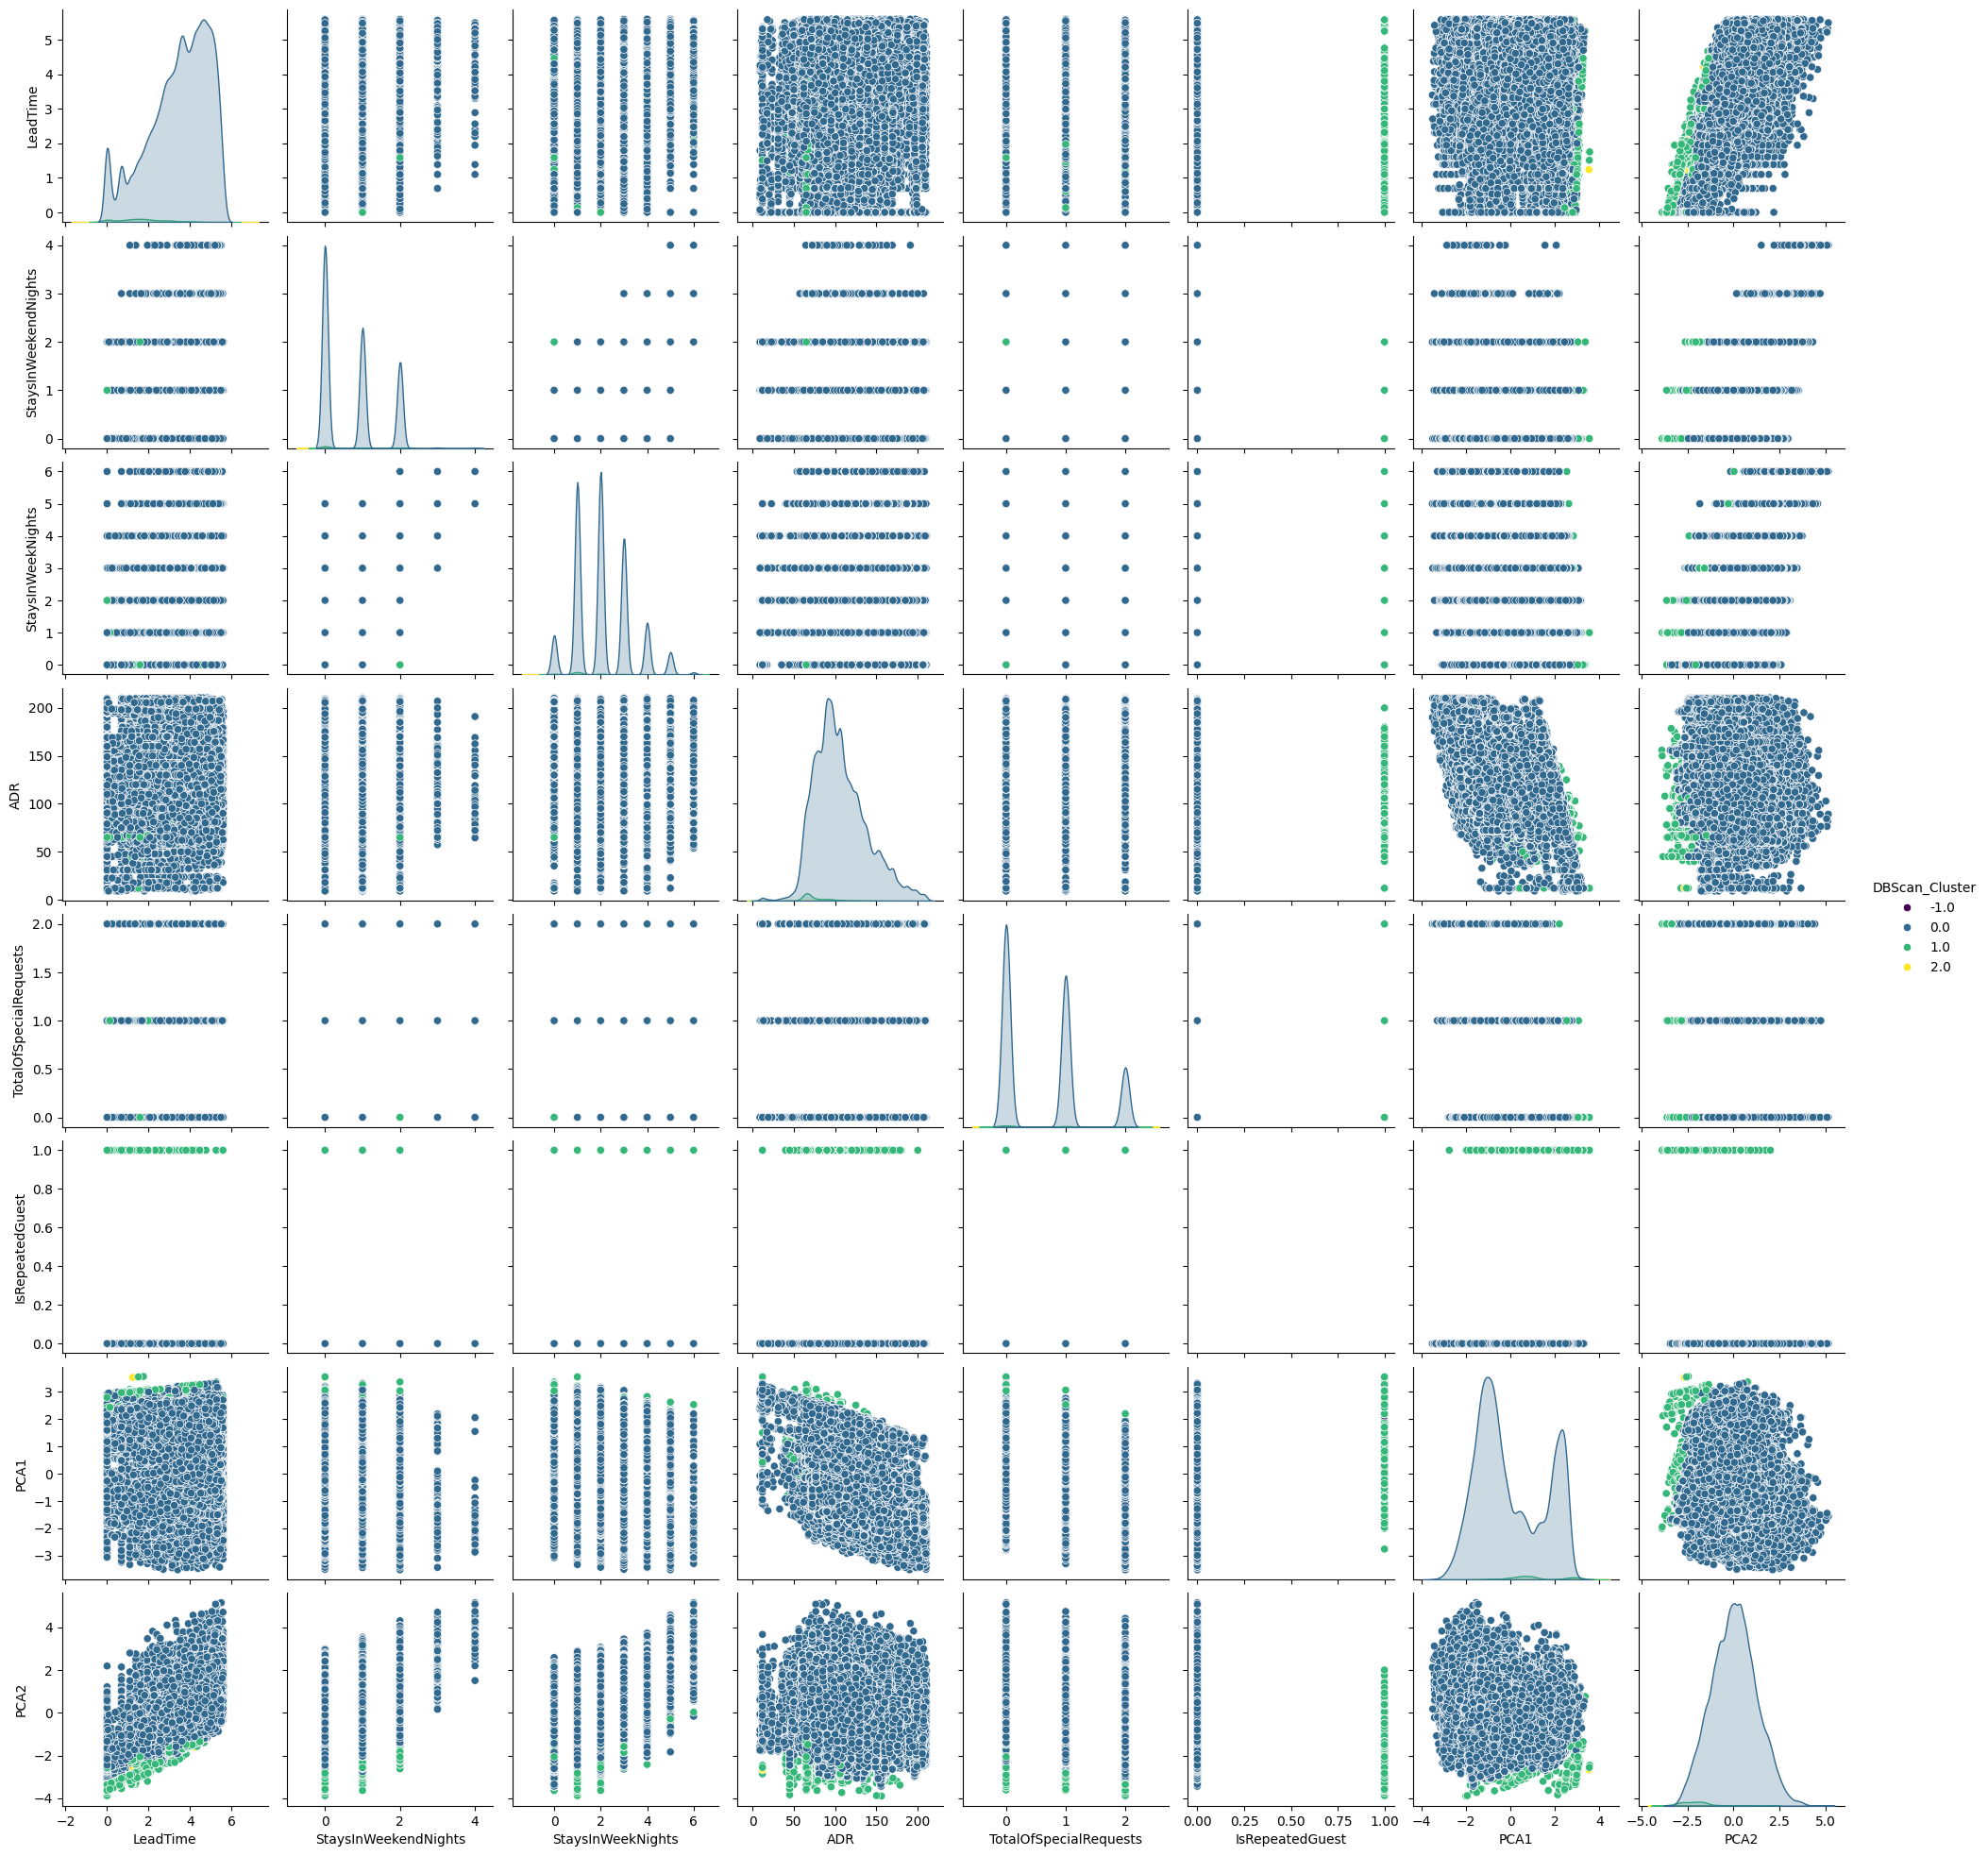

In [46]:
import seaborn as sns

# Pairplot for the df_segment dataframe
sns.pairplot(df_segment, hue='DBScan_Cluster', palette='viridis')
plt.show()